In [95]:
from scipy.interpolate import lagrange
import random
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

In [96]:
class RandPoly:
    """
    Random and zero free coefficient polynomial
    """

    def __init__(self, n, name='', R = None, fzc=False, p = 1337):
        self.name = name
        self.n = n
        self.p = p
        self.fzc = fzc # free zero coefficient
        if R:
            self.R = R
            # assert(len(R) == n)
        else: 
            self.R = [0] * (n+1) 
            for t in range(self.n+1):
                if t == 0 and fzc is True:
                    self.R[t] = (t, 0)
                else:
                    r = random.randint(1,self.p)
                    self.R[t] = (t, r)

    def poly(self, x):
        s = 0
        for (n, r) in self.R:
            s += r * x ** n
        return s

    
    def poly_str(self):
        """
        outputs the underlying polynomial
        """
        s = ""
        first_zero = self.R[0][1] == 0
        if first_zero:
            for (i, r) in self.R:
                if i == 0:
                    continue
                elif i == 1:
                    s +=  f"{r}x" 
                else:
                    s += f"+{r}x^{i}"
        else:
            for (i, r) in self.R:
                if i == 0:
                    s += f"{r}"
                elif i == 1:
                    s +=  f"+{r}x" 
                else:
                    s += f"+{r}x^{i}"
        if self.name:
            return f"{self.name}(x)={s}"
        else:
            return s

    def __str__(self):
        return self.poly_str()

    def __repr__(self):
        return self.poly_str()

    def __add__(self, other):
        n = min(len(self.R), len(other.R))
        m = max(len(self.R), len(other.R))
        R = [0] * m
        for i in range(m):
            if i < n:
                R[i] = (i, self.R[i][1] + other.R[i][1])
            elif i < len(self.R):
                R[i]= (i, self.R[i][1])
            elif i < other.R:
                 R[i][1] = (i, other.R[i][1])
        
        return RandPoly(n=self.n, R=R)
        

In [160]:
def make_graph(data_point_f, fcoefficients, data_point_g, gcoefficients, predicted_poly, f_shares, g_shares, square_root=True):
    x = np.linspace(-10, 10, 100)
    f = fcoefficients[0]+fcoefficients[1]*x+fcoefficients[2]*x**2
    g = gcoefficients[0]+gcoefficients[1]*x+gcoefficients[2]*x**2
    # s = predicted_poly_coefficients[0]+predicted_poly_coefficients[1]*x+predicted_poly_coefficients[2]*x**2
    s = []
    if square_root:
        s = [np.sqrt(abs(predicted_poly(i))) for i in x]
    else:
        s = [predicted_poly(i) for i in x]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    plt.plot(x, s, color='red')
    plt.plot(x, f, color='blue')
    plt.plot(x, g, color='green')
    plt.show()

In [98]:
y = 7 + 5*x**2 + 2*x

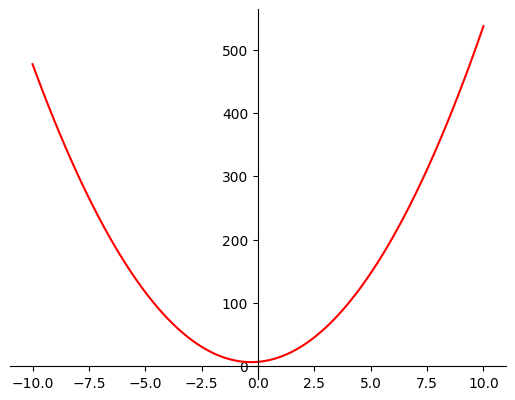

In [99]:
f =  RandPoly(n=2, R=[(0,7),(1,3),(2,5)])
coefficients = [7,3,5]

x = np.linspace(-10, 10, 100)
y = coefficients[0]+coefficients[1]*x+coefficients[2]*x**2

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.plot(x,y,'r')
plt.show()

In [100]:
def get_random_points(n, rand_seed, max_x=100000):
    points = random.Random(rand_seed).sample(range(1, max_x), n)
    return points


def generate_shares(func_array, x_points):
    shares = []
    for func in func_array:
        f = func.poly
        x_point_shares = {}
        for x in x_points:
            x_point_shares[x]=f(x)
        shares.append(x_point_shares)
    return shares

def reconstruct(x_points, shares):
    f = lagrange(x_points, shares)
    return f

def sum_distances(arr):
    return sum(arr)

def get_sum_squared_differences(alice_shares, server_shares, x_points):
    differences = []
    for x in x_points:
        sum_squared_diffs = 0
        for x_shares_a, x_shares_b in zip(alice_shares, server_shares):
            sum_squared_diffs += (x_shares_a[x]-x_shares_b[x])**2      
        differences.append(sum_squared_diffs)
    return differences

def get_plain_sum(alice_shares, server_shares, x_points):
    all_sums = []
    for x in x_points:
        sum = 0
        for x_shares_a, x_shares_b in zip(alice_shares, server_shares):
            sum += x_shares_a[x]+x_shares_b[x]   
        all_sums.append(sum)
    return all_sums

def generate_functions(features_arr, poly_degree):
    all_functions = []
    for feature in range(len(features_arr)):
        R_arr = [(0,features_arr[feature])]
        for i in range(1, poly_degree+1):
            R_arr.append((i, random.randint(2,250)))
        func = RandPoly(n=poly_degree, R=R_arr, name=f"f{feature}")
        all_functions.append(func)
    return all_functions
    # all_functions = []
    # for feature in range(len(features_arr)):
    #     func = RandPoly(name=f"f{feature}", n=2, 
    #                     R=[(i,x) for i, x in enumerate(list(
    #         [features_arr[feature],random.randint(2,250),random.randint(2,250)]))])
    #     all_functions.append(func)

    # return all_functions

def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

In [101]:
generate_functions([4,5],4)

[f0(x)=4+199x+16x^2+116x^3+187x^4, f1(x)=5+193x+61x^2+21x^3+33x^4]

In [102]:
def test_distance(alice_data, server_data, num_shares, rand_seed, poly_degree, alice_functions=[], server_functions=[], x_points=[]):
    if alice_functions == [] and server_functions == []:
        alice_functions = generate_functions(alice_data, poly_degree)
        server_functions = generate_functions(server_data, poly_degree)
    
    if x_points == []:
        x_points = get_random_points(num_shares, rand_seed)
    # print(x_points)

    # x_points = [x+1 for x in range(num_shares)]
    
    alice_shares = generate_shares(alice_functions, x_points)
    server_shares = generate_shares(server_functions, x_points)

    interpolation_points = get_sum_squared_differences(alice_shares, server_shares, x_points)

    # share_differences = get_feature_differences(alice_shares, server_shares)

    lagrange_func = reconstruct(x_points, interpolation_points)
    # print("Final func: ", lagrange_func)
    distance = np.sqrt(abs(lagrange_func(0)))
    print(f"Number of shares: {num_shares} Secure distance: {distance}")

    return lagrange_func, distance, alice_shares, server_shares

In [103]:
def test_sum(alice_data, server_data, num_shares, rand_seed, poly_degree, alice_functions=[], server_functions=[], x_points=[]):
    if alice_functions == [] and server_functions == []:
        alice_functions = generate_functions(alice_data, poly_degree)
        server_functions = generate_functions(server_data, poly_degree)
    
    if x_points == []:
        x_points = get_random_points(num_shares, rand_seed)
    # print(x_points)

    # x_points = [x+1 for x in range(num_shares)]
    
    alice_shares = generate_shares(alice_functions, x_points)
    server_shares = generate_shares(server_functions, x_points)

    interpolation_points = get_plain_sum(alice_shares, server_shares, x_points)

    # share_differences = get_feature_differences(alice_shares, server_shares)

    lagrange_func = reconstruct(x_points, interpolation_points)
    # print("Final func: ", lagrange_func)
    sum = abs(lagrange_func(0))
    print(f"Number of shares: {num_shares} Secure sum: {sum}")

    return lagrange_func, sum

In [104]:
alice_data = [0,4]
server_data = [3,11]
alice_functions = [RandPoly(n=2, R=[(0,alice_data[0]),(1,3),(2,5)]),
                    RandPoly(n=2, R=[(0,alice_data[1]),(1,4),(2,6)])]
server_functions = [RandPoly(n=2, R=[(0,server_data[0]),(1,7),(2,9)]),
                    RandPoly(n=2, R=[(0,server_data[1]),(1,8),(2,10)])]

print(f"alice: {alice_data}, server: {server_data}")
print(f"alice funcs: {alice_functions}, server funcs: {server_functions}")
print("Real distance: ", euclidean_distance(alice_data, server_data))
print("\nTesting 2d distance - sequential x_points")

for i in range(3,10):
    x_points = [x+1 for x in range(i)]
    test_distance(alice_data, server_data, i, 87,2,alice_functions, server_functions, x_points)

alice: [0, 4], server: [3, 11]
alice funcs: [3x+5x^2, 4+4x+6x^2], server funcs: [3+7x+9x^2, 11+8x+10x^2]
Real distance:  7.615773105863909

Testing 2d distance - sequential x_points
Number of shares: 3 Secure distance: 39.92492955535426
Number of shares: 4 Secure distance: 26.645825188948457
Number of shares: 5 Secure distance: 7.61577310586367
Number of shares: 6 Secure distance: 7.615773105861997
Number of shares: 7 Secure distance: 7.615773105851488
Number of shares: 8 Secure distance: 7.615773105821871
Number of shares: 9 Secure distance: 7.615773105802764


In [105]:
alice_data = [7]
server_data = [32]
alice_functions = [RandPoly(n=2, R=[(0,alice_data[0]),(1,3),(2,5)])]
server_functions = [RandPoly(n=2, R=[(0,server_data[0]),(1,7),(2,9)])]

print(f"alice: {alice_data}, server: {server_data}")
print(f"alice funcs: {alice_functions}, server funcs: {server_functions}")
print("Real distance: ", euclidean_distance(alice_data, server_data))
print("\nTesting 2d distance - sequential x_points")

for i in range(3,10):
    x_points = [x+1 for x in range(i)]
    test_distance(alice_data, server_data, i, 87,2,alice_functions, server_functions, x_points)

alice: [7], server: [32]
alice funcs: [7+3x+5x^2], server funcs: [32+7x+9x^2]
Real distance:  25.0

Testing 2d distance - sequential x_points
Number of shares: 3 Secure distance: 37.322915213043046
Number of shares: 4 Secure distance: 15.524174696260024
Number of shares: 5 Secure distance: 25.0
Number of shares: 6 Secure distance: 25.0
Number of shares: 7 Secure distance: 25.0
Number of shares: 8 Secure distance: 25.00000000000029
Number of shares: 9 Secure distance: 25.000000000002327


In [163]:
euclidean_distance([2,4],[6,12])**2

80.00000000000001


Testing 2 degree distance
alice: [843], server: [538]
alice funcs: [843+3x+5x^2], server funcs: [538+7x+9x^2]
Real distance:  305.0
Real sum:  1381
Number of shares: 2 Secure distance: 1134277.1251219872


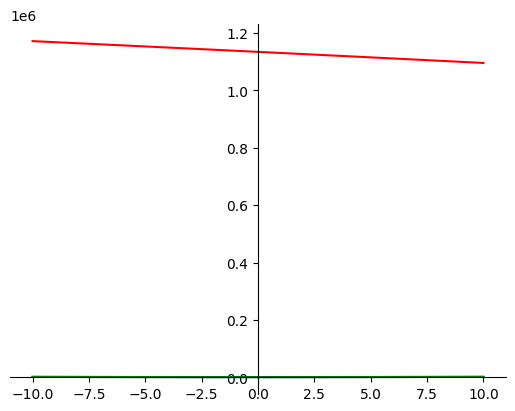

Number of shares: 3 Secure distance: 622813.8086338484


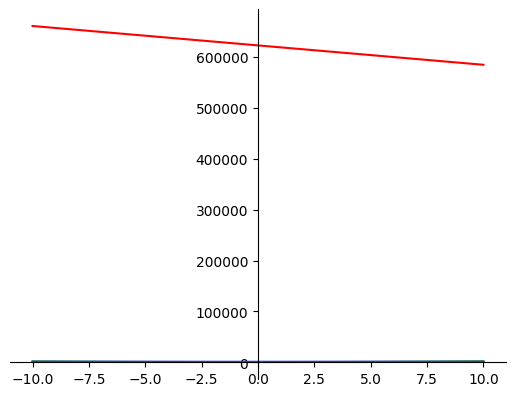

Number of shares: 4 Secure distance: 561905.8339036889


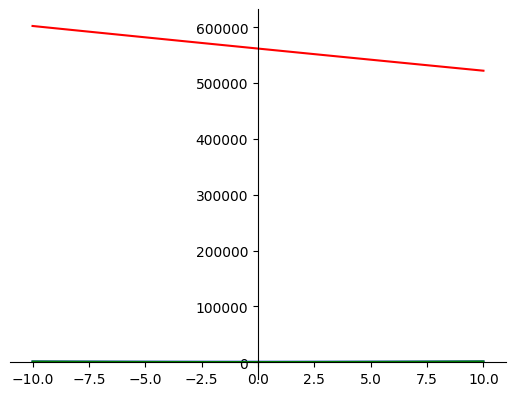

Number of shares: 5 Secure distance: 305.00002561475304


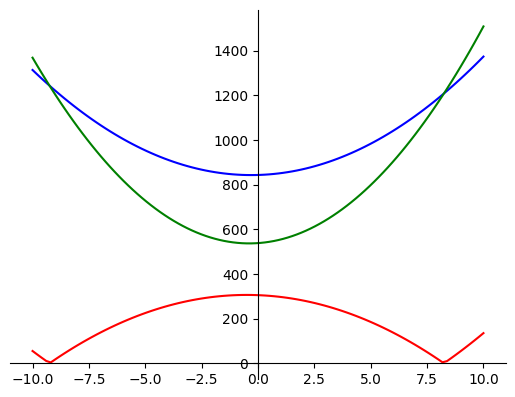

Number of shares: 6 Secure distance: 304.99918032676743


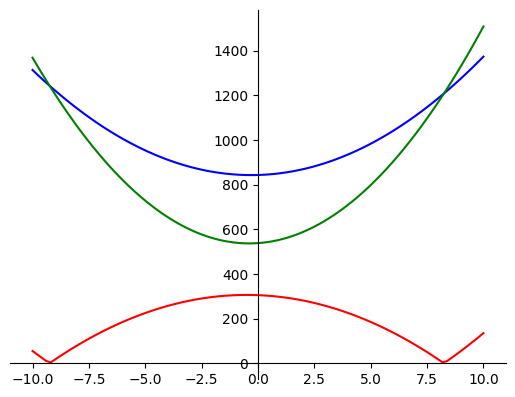

Number of shares: 7 Secure distance: 305.00035860634654


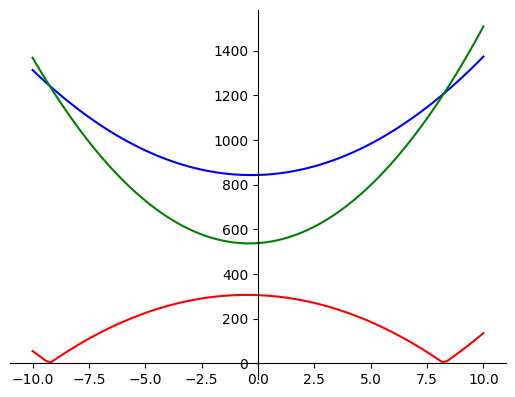

Number of shares: 8 Secure distance: 304.99971888795


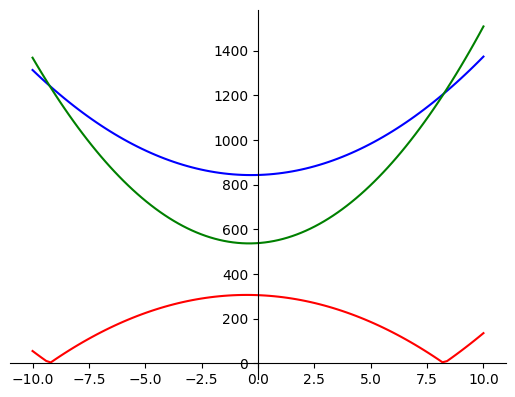

Number of shares: 9 Secure distance: 305.000029617058


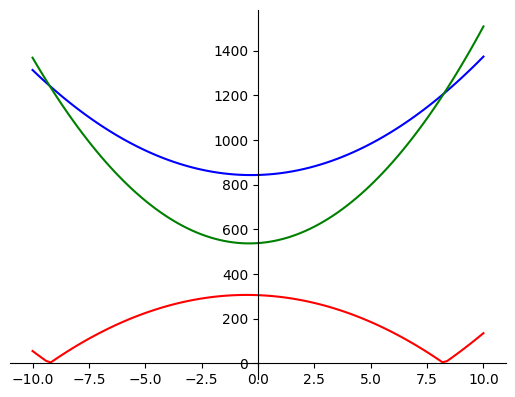

Number of shares: 10 Secure distance: 305.0


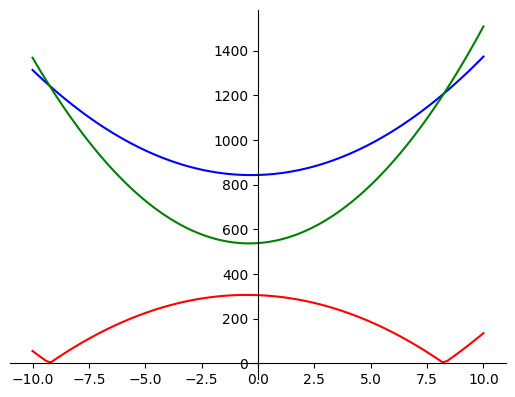

Number of shares: 11 Secure distance: 305.0004226431498


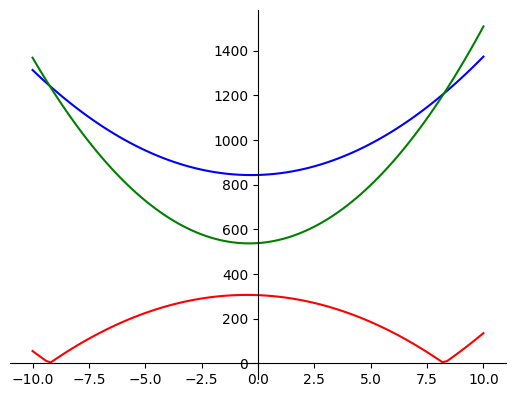

Number of shares: 12 Secure distance: 304.98729481734154


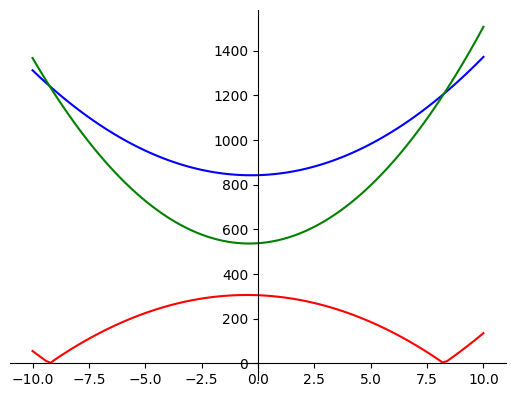

Number of shares: 13 Secure distance: 304.98524554476404


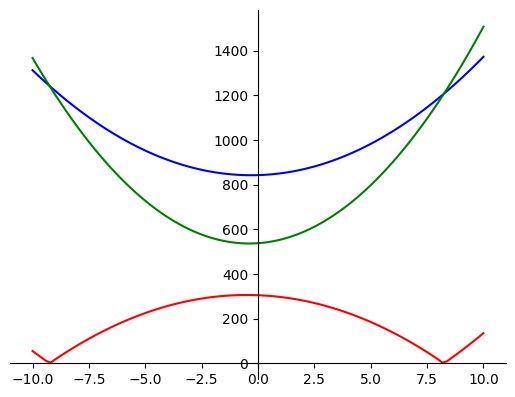

Number of shares: 14 Secure distance: 304.8409421321224


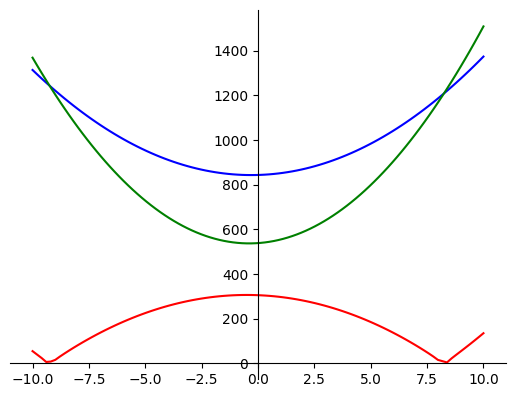

Number of shares: 15 Secure distance: 305.4275691551108


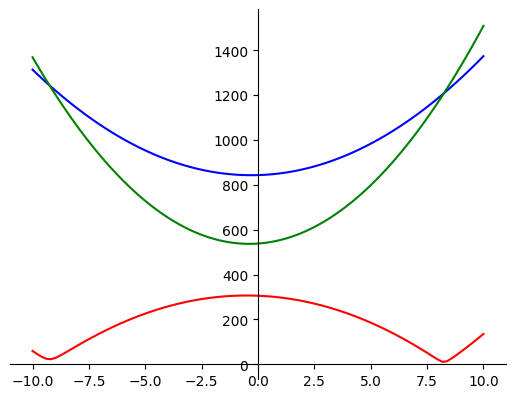

Number of shares: 16 Secure distance: 306.09802351534387


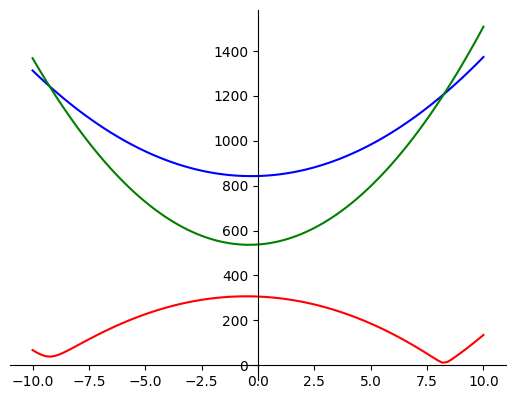

Number of shares: 17 Secure distance: 256.0


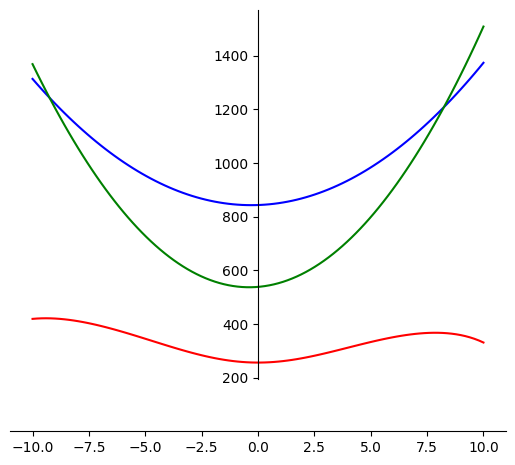

Number of shares: 18 Secure distance: 791.4745731860247


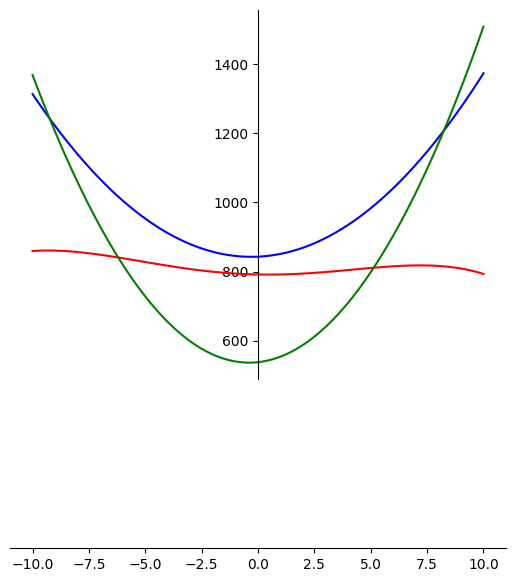

Number of shares: 19 Secure distance: 549.5985164616759


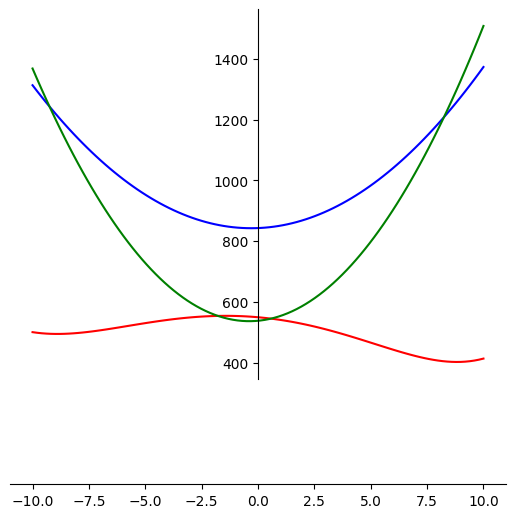

Number of shares: 20 Secure distance: 1280.0


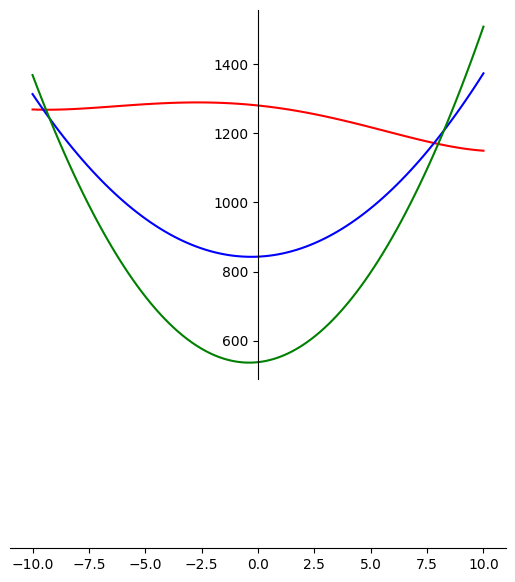

Number of shares: 21 Secure distance: 983.9349571999157


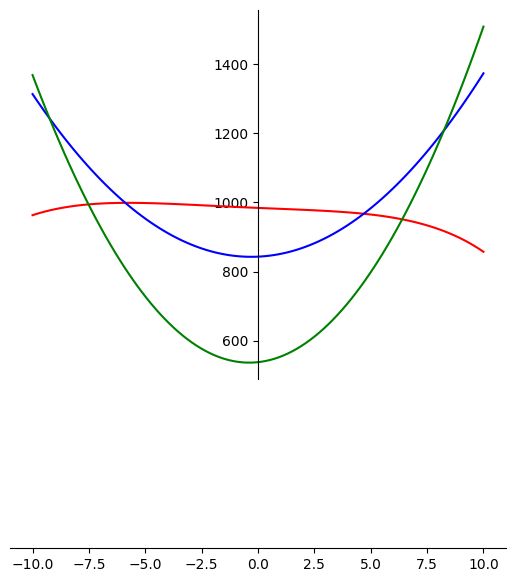

Number of shares: 22 Secure distance: 352.0395993103566


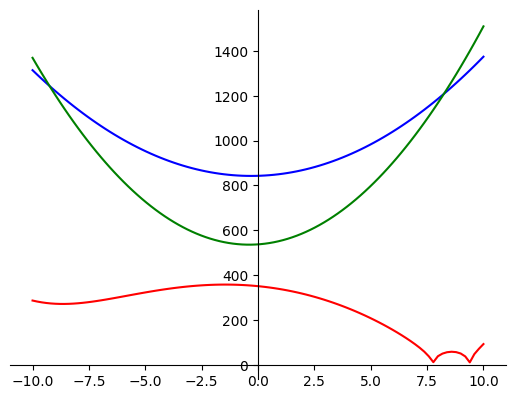

Number of shares: 23 Secure distance: 280.6634995862483


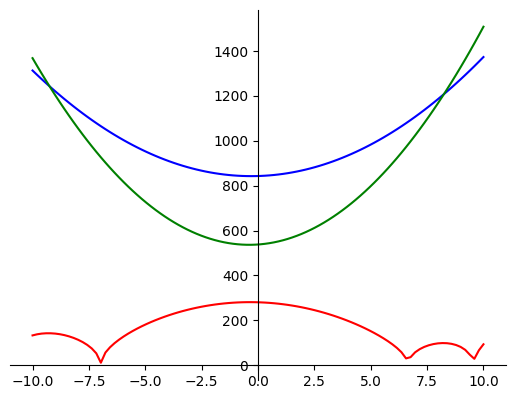

Number of shares: 24 Secure distance: 345.43885131814574


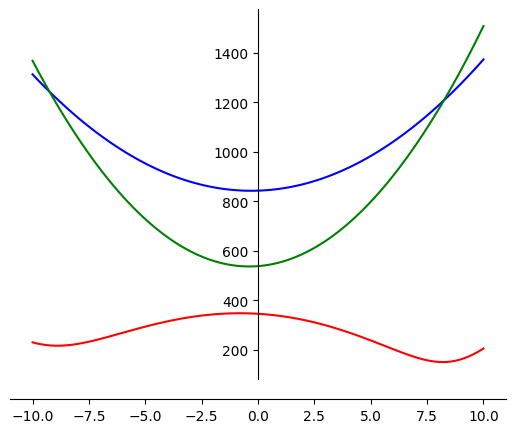

In [161]:
# testing distance - 1 feature
alice_data = [843]
server_data = [538]
# 1 degree
# print("\nTesting 1 degree distance")
# alice_functions = [RandPoly(n=2, R=[(0,alice_data[0]),(1,3)])]
# server_functions = [RandPoly(n=2, R=[(0,server_data[0]),(1,7)])]
# alice_coef = [alice_data[0],3]
# server_coef=[server_data[0],7]

# 2 degree
print("\nTesting 2 degree distance")
alice_functions = [RandPoly(n=2, R=[(0,alice_data[0]),(1,3),(2,5)])]
server_functions = [RandPoly(n=2, R=[(0,server_data[0]),(1,7),(2,9)])]
alice_coef = [alice_data[0],3,5]
server_coef=[server_data[0],7,9]

# 3 degree
# print("\nTesting 3 degree distance")
# alice_functions = [RandPoly(n=2, R=[(0,alice_data[0]),(1,3),(2,5),(3,12)])]
# server_functions = [RandPoly(n=2, R=[(0,server_data[0]),(1,7),(2,9),(3,15)])]
# alice_coef = [alice_data[0],3,5,12]
# server_coef=[server_data[0],7,9,15]

print(f"alice: {alice_data}, server: {server_data}")
print(f"alice funcs: {alice_functions}, server funcs: {server_functions}")
print("Real distance: ", euclidean_distance(alice_data, server_data))
print("Real sum: ", alice_data[0]+server_data[0])

for i in range(2,25):
    x_points = get_random_points(i,87,1000)
    # x_points = [x+1 for x in range(i)]
    # print(f"\nX_points: {x_points}")
    # test_distance(alice_data, server_data, i, 87,2,alice_functions, server_functions, x_points)
    # test_sum(alice_data, server_data, i, 87,2,alice_functions, server_functions, x_points)
    # lagrange_func, dist, alice_shares, server_shares = test_distance(alice_data, server_data, i, 87,2,alice_functions, server_functions, x_points)
    # make_graph(alice_data, alice_coef, server_data, server_coef, lagrange_func, alice_shares, server_shares)

test_distance(alice_data, server_data, i, 87,2,alice_functions, server_functions, [])


In [107]:
# Testing sum
alice_data = [7]
server_data = [32]
alice_functions = [RandPoly(n=2, R=[(0,alice_data[0]),(1,3),(2,5)])]
server_functions = [RandPoly(n=2, R=[(0,server_data[0]),(1,7),(2,9)])]

print(f"alice: {alice_data}, server: {server_data}")
print(f"alice funcs: {alice_functions}, server funcs: {server_functions}")
print("Real sum: ", alice_data[0]+server_data[0])
print("Testing 2d sum - sequential x_points")

for i in range(3,30):
    # x_points = get_random_points(i,87,100)
    x_points = [x+1 for x in range(i)]
    test_sum(alice_data, server_data, i, 87,2,alice_functions, server_functions, x_points)

alice: [7], server: [32]
alice funcs: [7+3x+5x^2], server funcs: [32+7x+9x^2]
Real sum:  39
Testing 2d sum - sequential x_points
Number of shares: 3 Secure sum: 39.0
Number of shares: 4 Secure sum: 39.0
Number of shares: 5 Secure sum: 38.99999999999994
Number of shares: 6 Secure sum: 38.999999999999545
Number of shares: 7 Secure sum: 38.99999999999818
Number of shares: 8 Secure sum: 38.999999999992724
Number of shares: 9 Secure sum: 38.99999999998545
Number of shares: 10 Secure sum: 38.999999999970896
Number of shares: 11 Secure sum: 38.99999999994179
Number of shares: 12 Secure sum: 38.999999999883585
Number of shares: 13 Secure sum: 38.99999999982583
Number of shares: 14 Secure sum: 38.99999999977399
Number of shares: 15 Secure sum: 39.00000000051659
Number of shares: 16 Secure sum: 39.00000000390082
Number of shares: 17 Secure sum: 39.000000011655175
Number of shares: 18 Secure sum: 39.00000003921741
Number of shares: 19 Secure sum: 39.000000097672455
Number of shares: 20 Secure sum

In [108]:
def test_1degree(num_shares, rand_seed):
    alice_data = [6]
    server_data = [11]
    alice_function = [RandPoly(n=2, R=[(0,alice_data[0]),(1,3),(2,5)])]
    server_function = [RandPoly(n=2, R=[(0,server_data[0]),(1,7),(2,9)])]

    x_points = get_random_points(num_shares, rand_seed)
    # print(x_points)

    # x_points = [x+1 for x in range(num_shares)]

    alice_shares = generate_shares(alice_function, x_points)
    server_shares = generate_shares(server_function, x_points)

    interpolation_points = get_sum_squared_differences(alice_shares, server_shares, x_points)

    # share_differences = get_feature_differences(alice_shares, server_shares)

    lagrange_func = reconstruct(x_points, interpolation_points)
    # print("Final func: ", lagrange_func)
    distance = np.sqrt(abs(lagrange_func(0)))
    print(f"Number of shares: {num_shares} Secure distance: {distance}")

    return lagrange_func, distance

In [109]:
features_arr = [4,8,2]

all_functions = []
for feature in range(len(features_arr)):
    func = RandPoly(
        name=f"f{feature}",
        n=2,
        R=[
            (i, x)
            for i, x in enumerate(
                list([features_arr[feature], random.randint(2, 250), random.randint(2, 250)])
            )
        ],
    )
    all_functions.append(func)

for f in all_functions:
    print(f.poly_str())


f0(x)=4+206x+210x^2
f1(x)=8+76x+239x^2
f2(x)=2+21x+69x^2
